In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

In [2]:
features = np.arange(10).reshape(5, 2)
features

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [29]:
labels = np.arange(0, 10, 2).reshape(-1, 1)
labels

array([[0],
       [2],
       [4],
       [6],
       [8]])

In [ ]:
arr = np.concatenate((features, labels), axis=1)
np.random.seed(24)
np.random.shuffle(arr)
print(arr)

[[8 9 8]
 [2 3 2]
 [0 1 0]
 [6 7 6]
 [4 5 4]]


In [46]:
# 从行索引的第二、三元素之间切开
np.vsplit(arr,[2, ])

[array([[8, 9, 8],
        [2, 3, 2]]),
 array([[0, 1, 0],
        [6, 7, 6],
        [4, 5, 4]])]

### 切分函数

In [48]:
def array_split(features, labels, rate=0.7, random_state=24):
    """训练集和测试集切分函数
    :param features: 特征数据
    :param labels: 标签数据
    :param rate: 训练集比例
    :param random_state: 随机种子
    :return: Xtrain, Xtest, ytrain, ytest: 训练集特征，测试集特征，训练集标签，测试集标签
    """

    arr = np.concatenate((features, labels), axis=1)
    np.random.seed(random_state)
    np.random.shuffle(arr)

    num_input = len(labels)               # 总数据量
    split_indices = int(num_input * rate) # 数据集划分的标记指标
    train_arr, test_arr = np.vsplit(arr, [split_indices, ])
    Xtrain, Xtest = train_arr[:, :-1], test_arr[:, :-1]
    ytrain, ytest = train_arr[:, -1].reshape(-1, 1), test_arr[:, -1].reshape(-1, 1)
    return Xtrain, Xtest, ytrain, ytest

In [49]:
array_split(features, labels)

(array([[8, 9],
        [2, 3],
        [0, 1]]),
 array([[6, 7],
        [4, 5]]),
 array([[8],
        [2],
        [0]]),
 array([[6],
        [4]]))

### 手动实现

In [74]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为0.5
features, labels = arrayGenReg(delta=0.01, num_examples=100)

# 数据切分
Xtrain, Xtest, ytrain, ytest = array_split(features, labels)

In [75]:
# 通过行列式，判断是否可逆
np.linalg.det(features.T.dot(features))

np.float64(898499.8443630707)

In [76]:
# 基础方法
w = np.linalg.inv(Xtrain.T.dot(Xtrain)) \
            .dot(Xtrain.T) \
            .dot(ytrain)
print(w)

# lstsq函数求解
w = np.linalg.lstsq(Xtrain, ytrain, rcond=-1)[0]

print(w)

[[ 1.9997832 ]
 [-0.99778163]
 [ 0.99907458]]
[[ 1.9997832 ]
 [-0.99778163]
 [ 0.99907458]]


In [77]:
SSELoss(Xtest, w, ytest)

array([[0.00340651]])

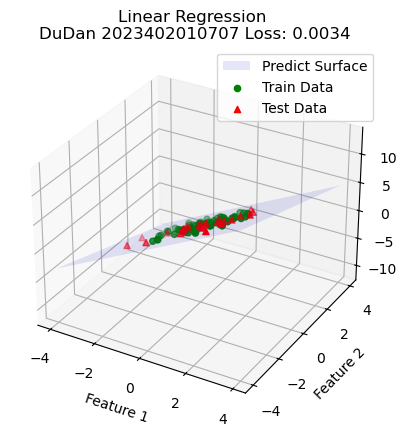

In [ ]:
# To-Do